## Hyperparameter Tuning for XGBoost, Random Forest, and LightGBM

**Steps**
- Apply hyperparameter tuning to XGBoost, Random Forest, and LightGBM to determine the best parameters for each model
- Compare the tuned models and select the final model

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import joblib
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score, roc_curve, precision_recall_curve, auc, f1_score, accuracy_score, precision_score, recall_score

In [2]:
#Read in train/test data from preprocessing
X_test = joblib.load('../data/X_test.pkl')
y_test = joblib.load('../data/y_test.pkl')
X_train = joblib.load('../data/X_res.pkl')
y_train = joblib.load('../data/y_res.pkl')

In [3]:
#Create a dictionary to store best models
best_models = {}

#Define hyperparameter grids 
#Choose a computationally manageable set that covers reasonable ranges of values
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate':[0.01, 0.1],
    'subsample': [0.8, 1.0]
}

param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate':[0.01, 0.1],
    'subsample': [0.8, 1.0]
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

#Tune XGBoost
print("Tuning XGBoost...")
xgb_model = XGBClassifier(eval_metric = 'logloss', random_state = 42)
grid_xgb = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid_xgb,
                        scoring = 'average_precision', 
                        cv = 3,
                        n_jobs = -1,
                        verbose = 1)

grid_xgb.fit(X_train, y_train)
best_models['XGBoost'] = grid_xgb.best_estimator_

print("Best XGBoost params:", grid_xgb.best_params_)

#Tune LightGBM
print("\nTuning LightGBM...")
lgb_model = LGBMClassifier(random_state = 42)
grid_lgb = GridSearchCV(estimator = lgb_model,
                       param_grid = param_grid_lgb,
                       scoring = 'average_precision',
                       cv = 3,
                       n_jobs = -1,
                       verbose = 1)

grid_lgb.fit(X_train, y_train)
best_models['LightGBM'] = grid_lgb.best_estimator_

print("Best LightGBM params:", grid_lgb.best_params_)

#Tune Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring='average_precision',  
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X_train, y_train)
best_models['Random Forest'] = grid_rf.best_estimator_

print("Best Random Forest params:", grid_rf.best_params_)


Tuning XGBoost...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best XGBoost params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Tuning LightGBM...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Number of positive: 151634, number of negative: 151634
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 303268, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [4]:
best_models

{'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None,
               num_parallel_tree=None, ...),
 'LightGBM': LGBMClassifier(max_depth=7, random_state=42, subsample=0.8),
 'Random Forest': RandomForestClassifier(max_features='log2', n_estimators=200, n_jobs=-1,
                        random_state

Note from the previous output that learning_rate = 0.1 for LightGBM, but it was not printed above because that is the default learning_rate for LGBMClassifier

In [5]:
#I am getting a warning about running out of memory, but best_models looks fine
#Double check that LightGBM model is ok
print(f"Best PR AUC score (LightGBM): {grid_lgb.best_score_}")

lgb_best_model = best_models['LightGBM']
y_pred = lgb_best_model.predict(X_test)

print('\n')
print("Prediction sample:", y_pred[:10])

print('\n')
print("LightGBM model accuracy:", lgb_best_model.score(X_test,y_test))

print('\n')


Best PR AUC score (LightGBM): 0.9998564961888006


Prediction sample: [0 0 0 0 0 0 0 0 0 0]


LightGBM model accuracy: 0.997524665566518




- The above produced valid results so LightGBM model is likely ok despite the warning message

In [6]:
cv_results_df = pd.DataFrame(grid_lgb.cv_results_)
print(cv_results_df[['params', 'mean_test_score']].head(10))
print('\n')
print(cv_results_df[cv_results_df['mean_test_score'].isna()])

                                              params  mean_test_score
0  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.988523
1  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.988523
2  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.991150
3  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.991150
4  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.996258
5  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.996258
6  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.997748
7  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.997748
8  {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.997485
9  {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.997485


Empty DataFrame
Columns: [mean_fit_time, std_fit_time, mean_score_time, std_score_time, param_learning_rate, param_max_depth, param_n_estimators, param_subsample, params, split0_test_score, split1_test_score, split2_test_score, 

- Since the data frame above is empty, the testing process did not crash, and best model was filled in, it appears that all tests completed successfully despite the warning for LightGBM


Evaluating threshold for tuned model: XGBoost
Best threshold with recall >= 0.85: 
threshold    0.714144
precision    0.817308
recall       0.867347
f1_score     0.841584
Name: 55251, dtype: float64


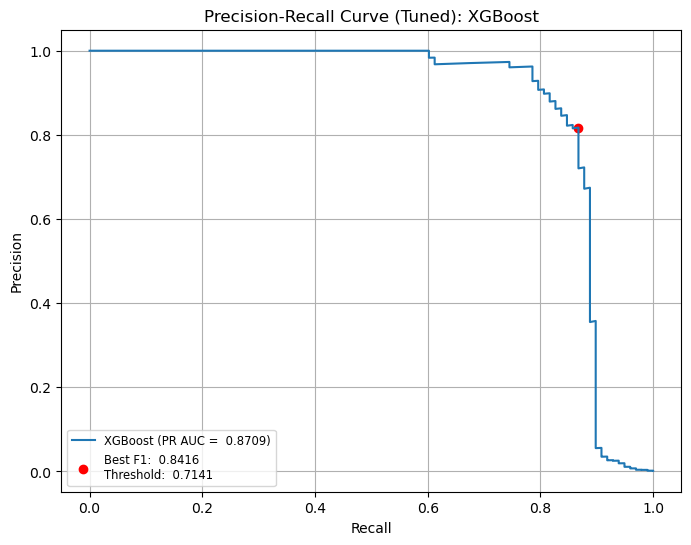


Evaluating threshold for tuned model: LightGBM
Best threshold with recall >= 0.85: 
threshold    0.842031
precision    0.694215
recall       0.857143
f1_score     0.767123
Name: 53273, dtype: float64


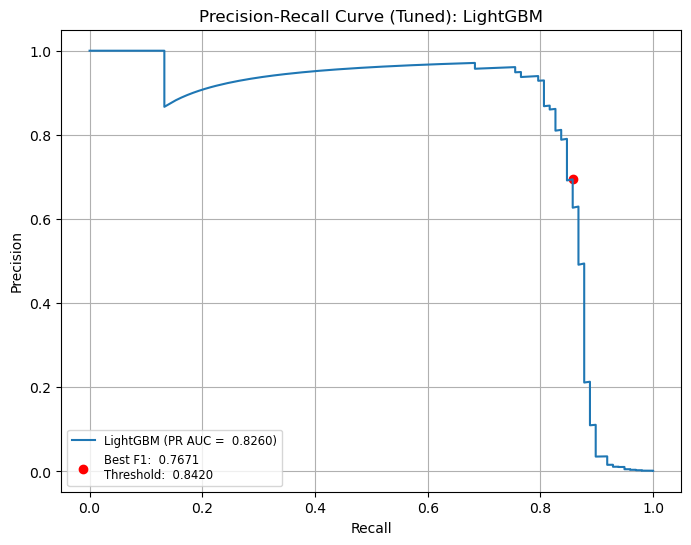


Evaluating threshold for tuned model: Random Forest
Best threshold with recall >= 0.85: 
threshold    0.395000
precision    0.809524
recall       0.867347
f1_score     0.837438
Name: 64, dtype: float64


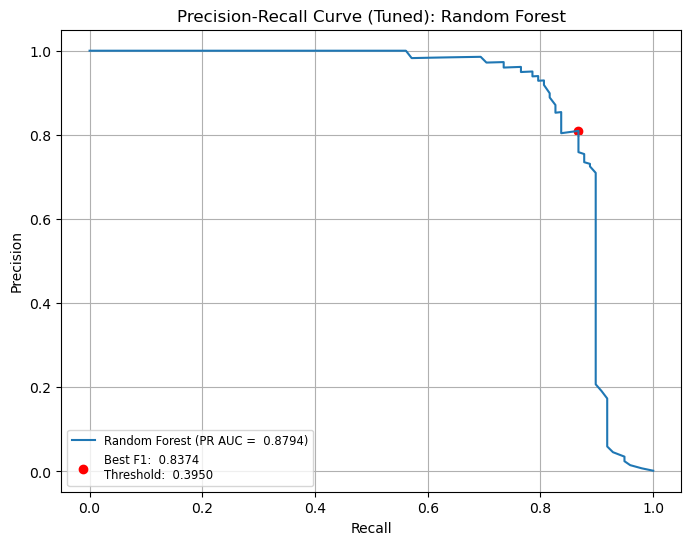

In [7]:
#Even though I created best thresholds in the previous step, I have to recreate the best threshold since hyperparameters have been changed
RECALL_THRESHOLD = 0.85
best_thresholds_tuned = {}

for name, model in best_models.items():
    print(f"\nEvaluating threshold for tuned model: {name}")

    #Get predicted probabilities for fraud class
    y_scores = model.predict_proba(X_test)[:, 1]

    #Get precision, recall, and threshold
    precision, recall, threshold = precision_recall_curve(y_test, y_scores)
    thresholds = np.append(threshold, np.nan) #Adding one more value because precision and recall are longer by 1 value than threshold

    #Calculate F1 score from precision and recall
    f1_scores = 2 * (precision * recall)/(precision + recall + 1e-6)
    #Adding negligible non-zero value to avoid a "divded by zero" error

    #Create a DataFrame
    pr_df = pd.DataFrame({
        'threshold': thresholds,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_scores
    })

    #Filter pr_df to those that meet recall >= RECALL_THRESHOLD
    pr_filtered = pr_df[pr_df['recall'] >= RECALL_THRESHOLD]

    if not pr_filtered.empty: #If pr_filtered has at least one row
        best_row = pr_filtered.sort_values('f1_score', ascending = False).iloc[0]
        best_thresholds_tuned[name] = best_row['threshold']
        print(f"Best threshold with recall >= {RECALL_THRESHOLD}: ")
        print(best_row)
    else:
        print(f"No threshold meets recall >= {RECALL_THRESHOLD}")
        #Create a dummy best_row so I can still see PR curve when there are no thresholds that meet the criteria
        best_row = pd.Series({
            'threshold': 0.0,
            'precision': 0.0,
            'recall': 0.0,
            'f1_score': 0.0
        })

    #Plot PR curve with threshold-based F1 coloring
    plt.figure(figsize = (8,6))
    plt.plot(recall, precision, label = f"{name} (PR AUC = {auc(recall, precision): .4f})")
    plt.scatter(best_row['recall'], best_row['precision'], color = 'red', label = f"Best F1: {best_row['f1_score']: .4f}\nThreshold: {best_row['threshold']: .4f}")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"Precision-Recall Curve (Tuned): {name}")
    plt.legend(loc = 'lower left', fontsize = 'small')
    plt.grid(True)
    plt.show()


In [8]:
best_thresholds_tuned

{'XGBoost': 0.714144229888916,
 'LightGBM': 0.8420307624189419,
 'Random Forest': 0.395}

In [9]:
#Evaluate the tuned models to choose the final model
metrics_tuned_list = []

for name, model in best_models.items():
    print(f"\nEvaluating tuned model: {name}...")

    #Start timer
    start_time = time.time()

    #Make predictions
    y_scores = model.predict_proba(X_test)[:,1]
    threshold = best_thresholds_tuned.get(name, 0.5)
    y_pred = (y_scores >= threshold).astype(int)

    #Calculate run time
    end_time = time.time()
    runtime = end_time - start_time

    #Calculate metrics
    precision = precision_score(y_test, y_pred, zero_division = 0)
    recall = recall_score(y_test, y_pred, zero_division = 0)
    f1 = f1_score(y_test, y_pred, zero_division = 0)
    accuracy = accuracy_score(y_test, y_pred)

    metrics_tuned_list.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy':accuracy,
        'Runtime (s)': runtime
    })
    
    #Print results
    print(f"Threshold used: {threshold: .2f}")
    print(f"Runtime: {runtime: .4} seconds")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, digits = 4))



Evaluating tuned model: XGBoost...
Threshold used:  0.71
Runtime:  0.0683 seconds
Confusion Matrix:
 [[56845    19]
 [   13    85]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9997    0.9997     56864
           1     0.8173    0.8673    0.8416        98

    accuracy                         0.9994     56962
   macro avg     0.9085    0.9335    0.9207     56962
weighted avg     0.9995    0.9994    0.9994     56962


Evaluating tuned model: LightGBM...
Threshold used:  0.84
Runtime:  0.03681 seconds
Confusion Matrix:
 [[56827    37]
 [   14    84]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9993    0.9996     56864
           1     0.6942    0.8571    0.7671        98

    accuracy                         0.9991     56962
   macro avg     0.8470    0.9282    0.8833     56962
weighted avg     0.9992    0.9991    0.9992     56962


Evaluating tuned model: Rando

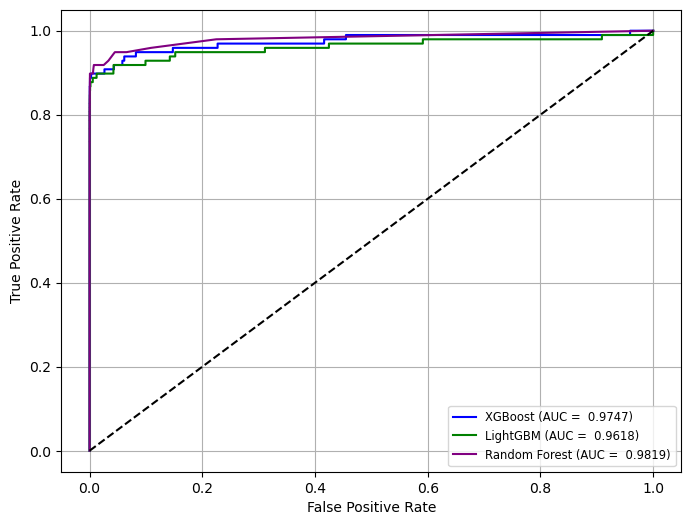

In [11]:
#Create ROC and PR curves
#Colors and models
colors = {'XGBoost': 'blue', 'LightGBM': 'green', 'Random Forest': 'purple'}

#Create ROC curve
plt.figure(figsize = (8,6))
for name, model in best_models.items():
    y_scores = model.predict_proba(X_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc: .4f})", color = colors[name]) 

plt.plot([0,1],[0,1], 'k--') #add a diagonal line
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#Add labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.savefig("roc_curve_tuned_models.png", dpi = 300)
plt.show()

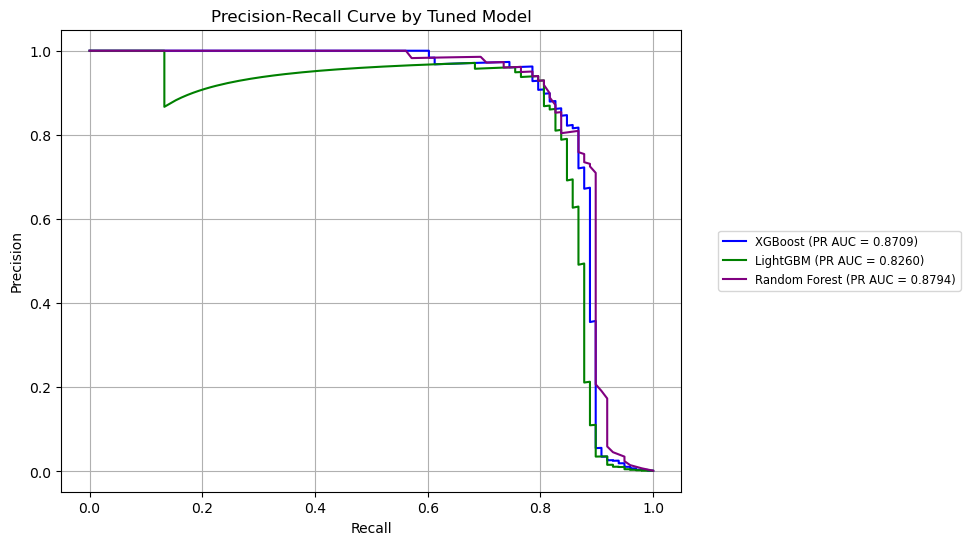

In [12]:
#Create PR curve
plt.figure(figsize = (8,6))
for name, model in best_models.items():
    y_scores = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (PR AUC = {pr_auc:.4f})", color = colors[name])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve by Tuned Model')
plt.legend(loc = 'center left', bbox_to_anchor=(1.05,0.5), fontsize = 'small')
plt.grid(True)
plt.savefig("PR_curve_tuned_models.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [13]:
#pd.DataFrame(best_models['XGBoost'].predict_proba(X_test))

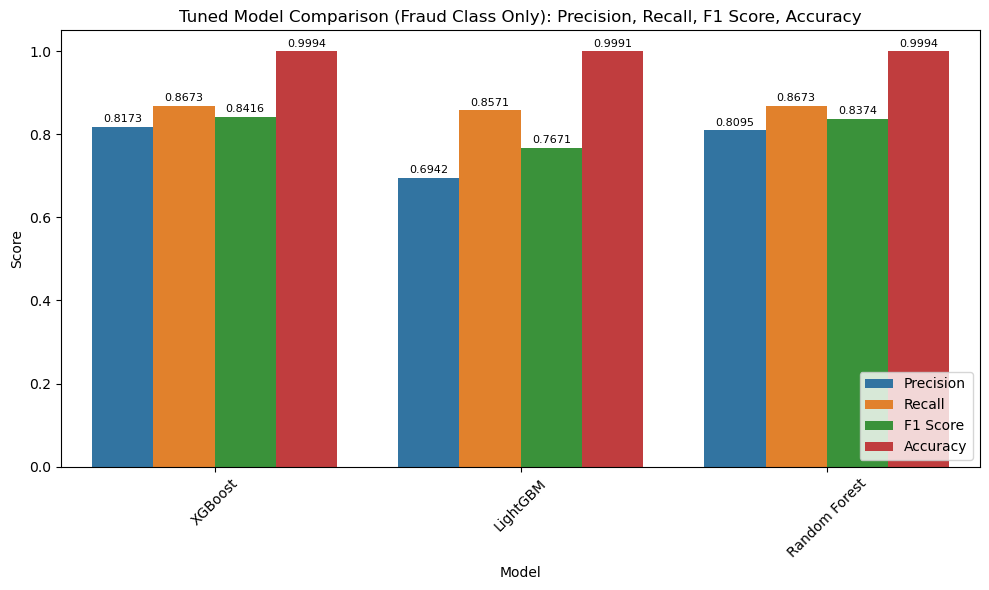

In [14]:
#Plot metrics
metrics_tuned_df = pd.DataFrame(metrics_tuned_list)
#Transpose to long format for plotting
metrics_tuned_long = metrics_tuned_df.melt(id_vars = 'Model', 
                                           value_vars = ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
                                           var_name = 'Metric', 
                                           value_name = 'Score')


#Plot metrics in grouped bar chart
plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'Model', y = 'Score', hue = 'Metric', data = metrics_tuned_long)
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', padding=2, fontsize=8)
plt.title('Tuned Model Comparison (Fraud Class Only): Precision, Recall, F1 Score, Accuracy')
plt.ylim(0,1.05)
plt.xticks(rotation = 45)
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("evaluation_metrics_tuned_models.png", dpi = 300)
plt.show()

**Results**
- The bar graphs above show that under the best parameters, XGBoost and Random Forest are better than LightGBM in terms of precision, recall, F1 score, and accuracy
- Between the two, XGBoost is slightly better than Random Forest in precision and F1 Score, which is also shown in the confusion matrices
- Applying models took well under 1 second for all models, but XGBoost was faster than Random Forest (but slower than LightGBM)
- The ROC curve and PR curve as well as the corresponding AUC values indicate that Random Forest performs the best, and XGBoost is the second best, although the two models perform similarly and well (ROC AUC > 0.97, PR AUC > 0.87 for both models). Note that these metrics are independent of tresholds

**Conclusion**
- Since I will use a fixed threshold model in application, I will choose XGBoost as the final model because the tuned XGBoost model with the fixed threshold yielded the best precision, recall, F1 score, and accuracy scores. Note that recall and accuracy for XGBoost and Random Forest are essentially the same
- Even though AUC values are slightly higher for Random Forest than for XGBoost, both models had high AUC values for both ROC and PR curves, and these values/curves are created over various thresholds

**Next Step - Application**
- Build a pipeline for XGBoost that includes preprocessing, application of the final model, and prediction
- Provide a pipeline application example

In [15]:
#Save the tuned XGBoost model (final model) and best threshold
joblib.dump(best_models['XGBoost'], "../data/final_xgboost_model.pkl")
joblib.dump(best_thresholds_tuned['XGBoost'], "../data/final_xgboost_threshold.pkl")

['../data/final_xgboost_threshold.pkl']